In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [26]:
# Assign column names
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data.columns = columns

In [27]:
# Convert Diagnosis to numerical (Malignant=1, Benign=0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [28]:
# Select features and labels
X = data.iloc[:, 2:].values
y = data['Diagnosis'].values

In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.956140350877193


In [39]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 0.868421052631579


In [41]:
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9824561403508771


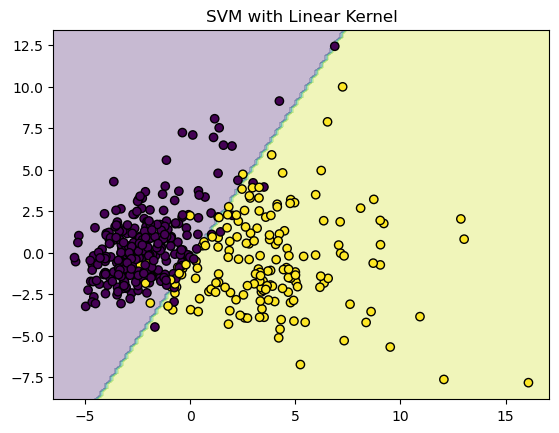

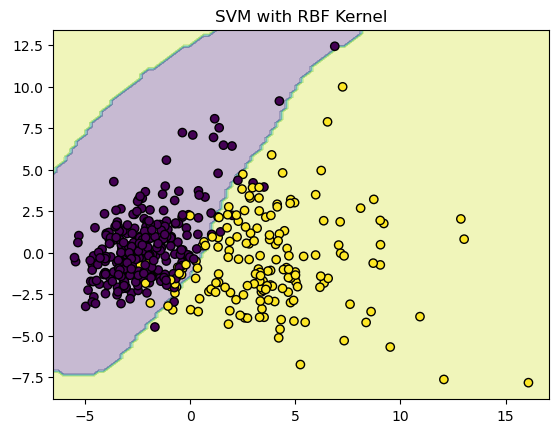

In [43]:
from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    model.fit(X_pca, y)
    
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(SVC(kernel='linear'), X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(SVC(kernel='rbf', gamma='scale'), X_train, y_train, "SVM with RBF Kernel")